# Day 08. Exercise 05
# Clustering

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
df = pd.read_csv("data/regression.csv")
df = df.drop(columns=["pageviews"])
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [3]:
X = df[['num_commits', 'AVG(diff)']].copy()


KMeans Klasterlash:


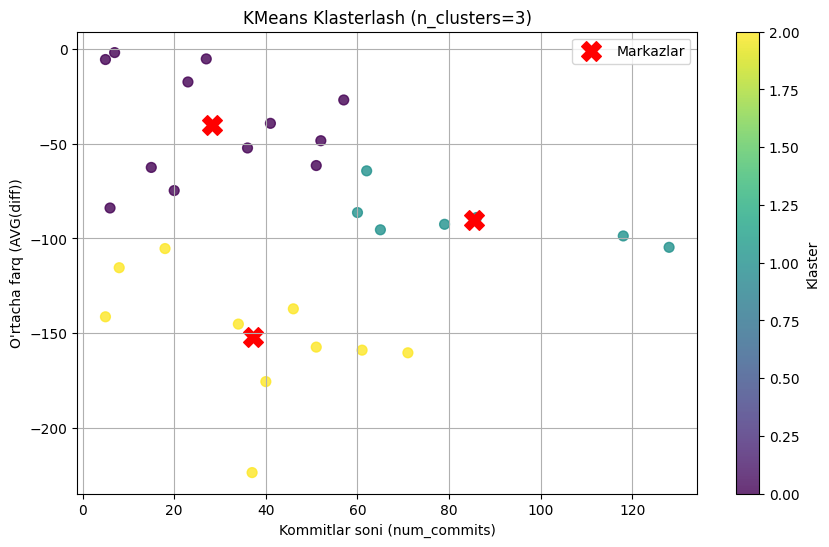

In [4]:

# 2. KMeans
print("KMeans Klasterlash:")

# 2.1 KMeans algoritmi haqida hujjatlarni tekshiring:
# KMeans - bu klasterlashning eng mashhur algoritmlaridan biri.
# U ma'lumot nuqtalarini klasterlarga ajratish uchun ishlatiladi, bunda har bir ma'lumot nuqtasi o'ziga eng yaqin markazga (centroid) tegishli bo'ladi.
# random_state - tasodifiy son generatorining boshlang'ich holati. Bu natijalarni takrorlanuvchi qiladi.
# n_clusters - yaratiladigan klasterlar soni.

# 2.2 Klasterlar yaratish (n_clusters=3, random_state=21)
kmeans = KMeans(n_clusters=3, random_state=21, n_init=10) # n_init=10 qo'shildi KMeans 1.2 versiyasi talabiga ko'ra
kmeans_labels = kmeans.fit_predict(X)
X['KMeans_Cluster'] = kmeans_labels

# 2.3 Ma'lumotlarni scatter plotda vizuallashtirish
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['num_commits'], X['AVG(diff)'], c=X['KMeans_Cluster'], cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Markazlar') # Markazlarni chizish
plt.title('KMeans Klasterlash (n_clusters=3)')
plt.xlabel('Kommitlar soni (num_commits)')
plt.ylabel('O\'rtacha farq (AVG(diff))')
plt.colorbar(scatter, label='Klaster')
plt.legend()
plt.grid(True)
plt.show()

KMeans: n_clusters ning turli qiymatlarini sinash.


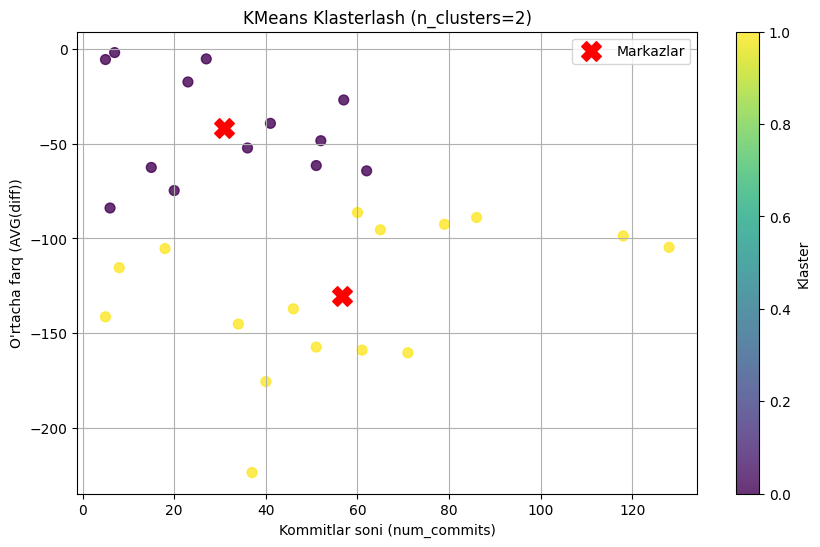

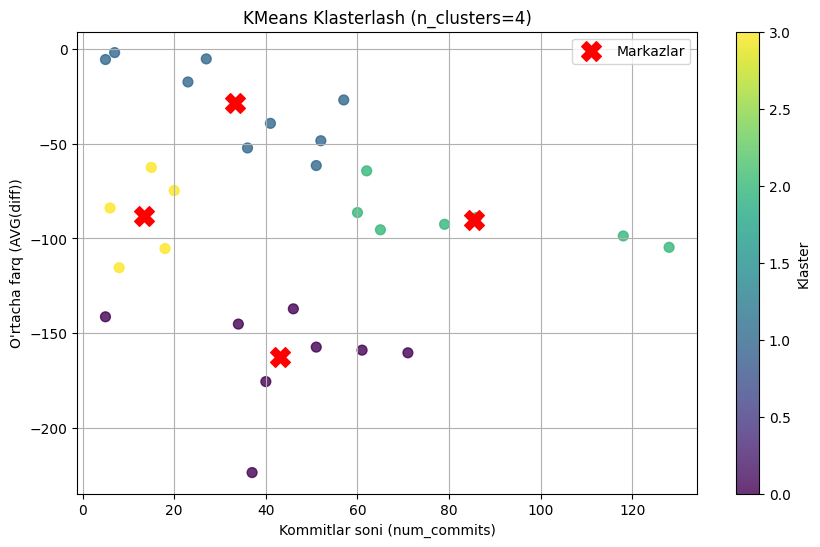

In [5]:

# 2.4 n_clusters ning turli qiymatlarini sinab ko'ring
# Masalan, n_clusters=2 va n_clusters=4 bilan sinab ko'ring
print("KMeans: n_clusters ning turli qiymatlarini sinash.")
for n in [2, 4]:
    kmeans_temp = KMeans(n_clusters=n, random_state=21, n_init=10)
    kmeans_labels_temp = kmeans_temp.fit_predict(X[['num_commits', 'AVG(diff)']])
    
    plt.figure(figsize=(10, 6))
    scatter_temp = plt.scatter(X['num_commits'], X['AVG(diff)'], c=kmeans_labels_temp, cmap='viridis', s=50, alpha=0.8)
    plt.scatter(kmeans_temp.cluster_centers_[:, 0], kmeans_temp.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Markazlar')
    plt.title(f'KMeans Klasterlash (n_clusters={n})')
    plt.xlabel('Kommitlar soni (num_commits)')
    plt.ylabel('O\'rtacha farq (AVG(diff))')
    plt.colorbar(scatter_temp, label='Klaster')
    plt.legend()
    plt.grid(True)
    plt.show()


In [6]:

# 2.5 silhouette_score hisoblash
# silhouette_score - bu klasterlashning sifatini baholash uchun ishlatiladigan metrika.
# U klaster ichidagi nuqtaning qanchalik yaqin ekanligini (cohesion) va boshqa klasterlardan qanchalik uzoq ekanligini (separation) o'lchaydi.
# Qiymat -1 dan 1 gacha bo'ladi, bunda 1 eng yaxshi klasterlashni, -1 eng yomon klasterlashni bildiradi.
kmeans_score = silhouette_score(X[['num_commits', 'AVG(diff)']], kmeans_labels)
print(f"KMeans (n_clusters=3) uchun Silhouette Score: {kmeans_score:.4f}\n")



KMeans (n_clusters=3) uchun Silhouette Score: 0.4390



## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [7]:

# 3.2 Klasterlar yaratish (eps=20, min_samples=2)
dbscan = DBSCAN(eps=20, min_samples=2)
dbscan_labels = dbscan.fit_predict(X[['num_commits', 'AVG(diff)']])
X['DBSCAN_Cluster'] = dbscan_labels

# Ba'zi nuqtalar -1 klasterga tayinlanishi mumkin (shovqinli nuqtalar), ularni vizualizatsiya qilishda alohida rang beramiz.
# Klasterlar soni -1 ni hisobga olmaganda klaster labelining noyob qiymatlari sonidir.
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN tomonidan aniqlangan klasterlar soni: {n_clusters_dbscan}")

DBSCAN tomonidan aniqlangan klasterlar soni: 9


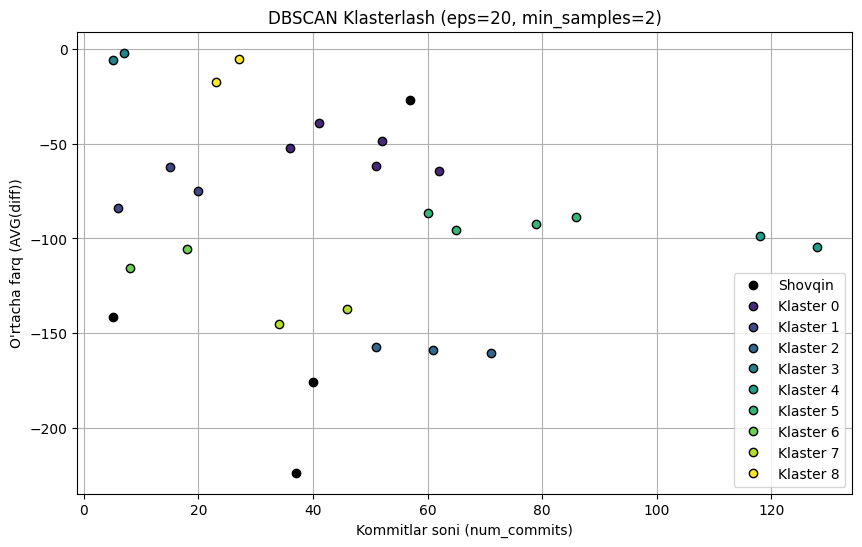

In [8]:

# 3.3 Ma'lumotlarni scatter plotda vizuallashtirish
plt.figure(figsize=(10, 6))
# -1 klasterga tegishli nuqtalarni qora rangda belgilaymiz
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Shovqinli nuqtalar
        class_member_mask = (dbscan_labels == k)
        xy = X[['num_commits', 'AVG(diff)']][class_member_mask]
        plt.plot(xy['num_commits'], xy['AVG(diff)'], 'o', markerfacecolor='black', markeredgecolor='k', markersize=6, label='Shovqin')
    else:
        # Haqiqiy klasterlar
        class_member_mask = (dbscan_labels == k)
        xy = X[['num_commits', 'AVG(diff)']][class_member_mask]
        plt.plot(xy['num_commits'], xy['AVG(diff)'], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6, label=f'Klaster {k}')

plt.title('DBSCAN Klasterlash (eps=20, min_samples=2)')
plt.xlabel('Kommitlar soni (num_commits)')
plt.ylabel('O\'rtacha farq (AVG(diff))')
plt.grid(True)
plt.legend()
plt.show()


DBSCAN: eps va min_samples ning turli qiymatlarini sinash.


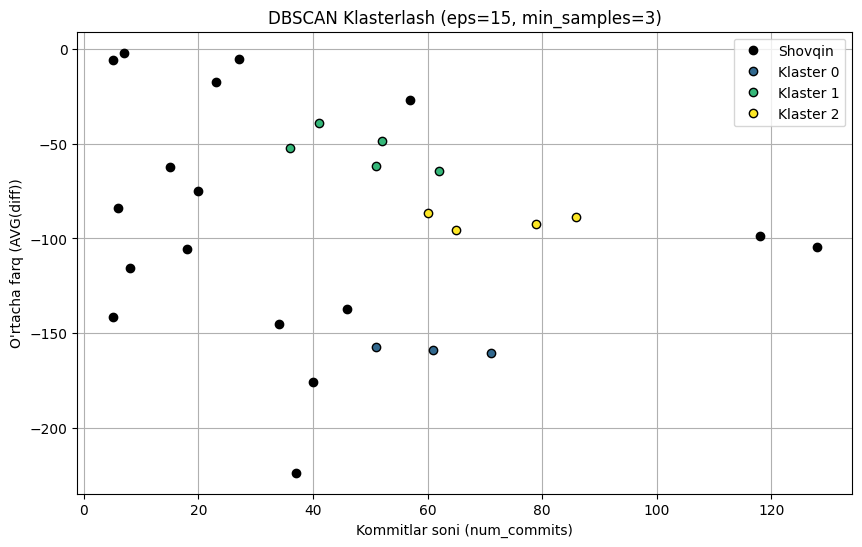

In [9]:

# 3.4 eps va min_samples ning turli qiymatlarini sinab ko'ring
print("DBSCAN: eps va min_samples ning turli qiymatlarini sinash.")
# Misol uchun, eps=15, min_samples=3 bilan sinab ko'ring
dbscan_temp = DBSCAN(eps=15, min_samples=3)
dbscan_labels_temp = dbscan_temp.fit_predict(X[['num_commits', 'AVG(diff)']])

plt.figure(figsize=(10, 6))
unique_labels_temp = np.unique(dbscan_labels_temp)
colors_temp = plt.cm.viridis(np.linspace(0, 1, len(unique_labels_temp)))

for k, col in zip(unique_labels_temp, colors_temp):
    if k == -1:
        class_member_mask = (dbscan_labels_temp == k)
        xy = X[['num_commits', 'AVG(diff)']][class_member_mask]
        plt.plot(xy['num_commits'], xy['AVG(diff)'], 'o', markerfacecolor='black', markeredgecolor='k', markersize=6, label='Shovqin')
    else:
        class_member_mask = (dbscan_labels_temp == k)
        xy = X[['num_commits', 'AVG(diff)']][class_member_mask]
        plt.plot(xy['num_commits'], xy['AVG(diff)'], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6, label=f'Klaster {k}')

plt.title('DBSCAN Klasterlash (eps=15, min_samples=3)')
plt.xlabel('Kommitlar soni (num_commits)')
plt.ylabel('O\'rtacha farq (AVG(diff))')
plt.grid(True)
plt.legend()
plt.show()

In [10]:

# 3.5 silhouette_score hisoblash
# DBSCAN uchun silhouette_score hisoblashda shovqinli nuqtalarni (label -1) chiqarib tashlash kerak.
# Chunki silhouette_score shovqinsiz klasterlash uchun mo'ljallangan.
core_samples_mask = (dbscan_labels != -1)
if np.sum(core_samples_mask) > 1 and len(np.unique(dbscan_labels[core_samples_mask])) > 1:
    dbscan_score = silhouette_score(X[['num_commits', 'AVG(diff)']][core_samples_mask], dbscan_labels[core_samples_mask])
    print(f"DBSCAN (eps=20, min_samples=2) uchun Silhouette Score (shovqinsiz): {dbscan_score:.4f}\n")
else:
    print("DBSCAN uchun silhouette_score hisoblash uchun etarli klasterlar va nuqtalar mavjud emas (shovqinli nuqtalarni chiqarib tashlagandan so'ng).\n")


DBSCAN (eps=20, min_samples=2) uchun Silhouette Score (shovqinsiz): 0.5442



## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [11]:

# 4. Hierarchical (AgglomerativeClustering)
# 4.1 Algoritm haqida hujjatlarni tekshiring:
# AgglomerativeClustering - ierarxik klasterlashning pastdan-yuqoriga (agglomerative) usulini amalga oshiradi.
# U har bir ma'lumot nuqtasini alohida klaster deb hisoblaydi va keyin klasterlarni bosqichma-bosqich birlashtiradi.
# n_clusters - birlashtirish to'xtaydigan klasterlar soni.

# 4.2 Klasterlar yaratish (n_clusters=5)
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(X[['num_commits', 'AVG(diff)']])
X['Agglomerative_Cluster'] = agg_labels

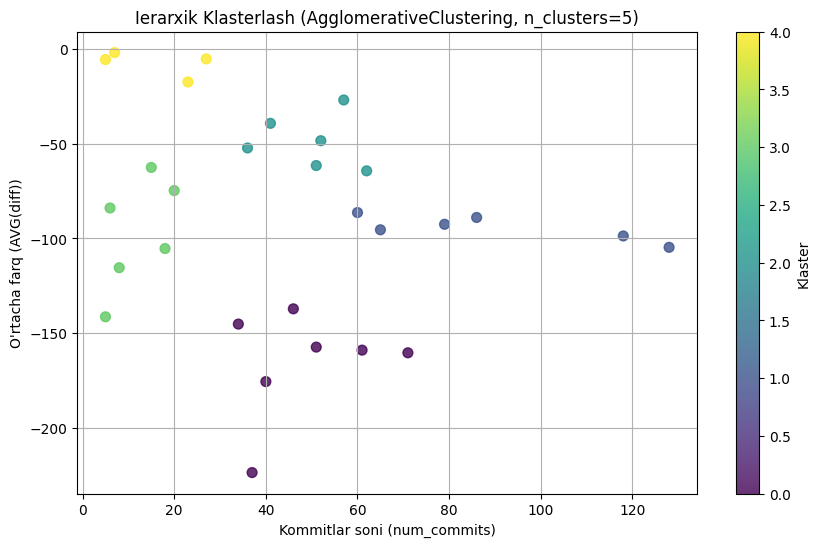

In [12]:

# 4.3 Ma'lumotlarni scatter plotda vizuallashtirish
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['num_commits'], X['AVG(diff)'], c=X['Agglomerative_Cluster'], cmap='viridis', s=50, alpha=0.8)
plt.title('Ierarxik Klasterlash (AgglomerativeClustering, n_clusters=5)')
plt.xlabel('Kommitlar soni (num_commits)')
plt.ylabel('O\'rtacha farq (AVG(diff))')
plt.colorbar(scatter, label='Klaster')
plt.grid(True)
plt.show()

Ierarxik Klasterlash: n_clusters ning turli qiymatlarini sinash.


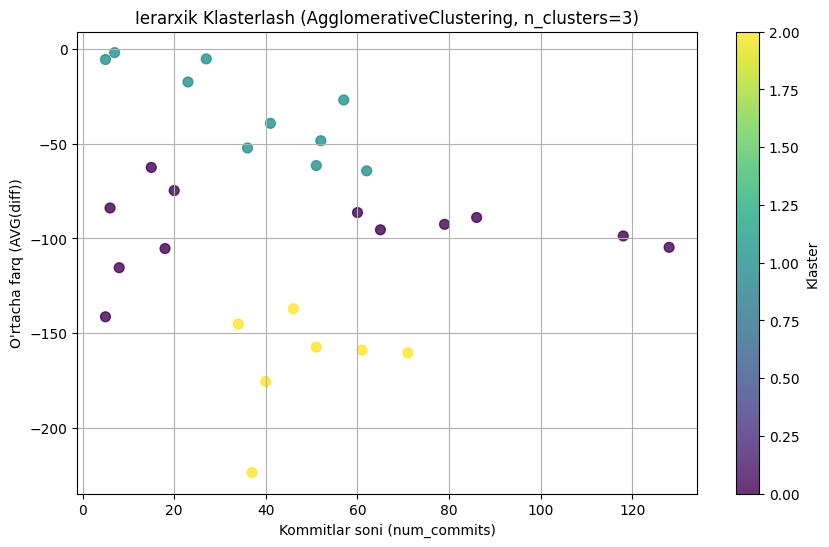

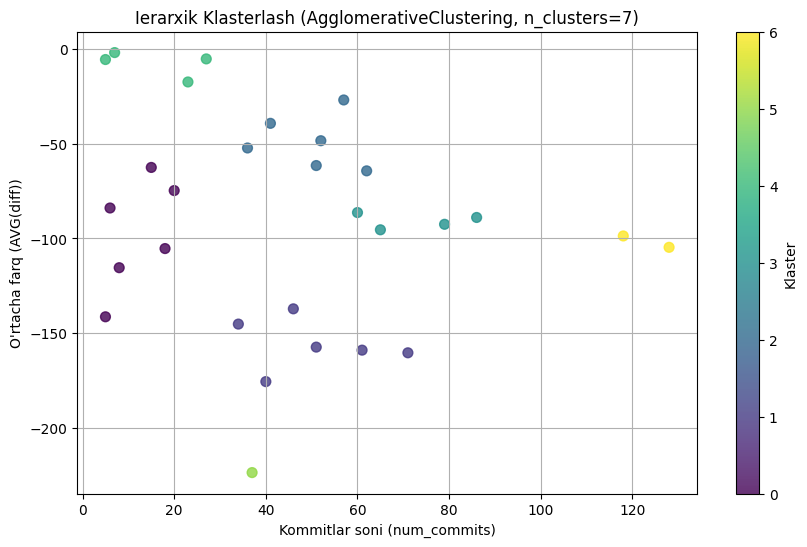

In [13]:

# 4.4 n_clusters ning turli qiymatlarini sinab ko'ring
print("Ierarxik Klasterlash: n_clusters ning turli qiymatlarini sinash.")
# Misol uchun, n_clusters=3 va n_clusters=7 bilan sinab ko'ring
for n in [3, 7]:
    agg_clustering_temp = AgglomerativeClustering(n_clusters=n)
    agg_labels_temp = agg_clustering_temp.fit_predict(X[['num_commits', 'AVG(diff)']])
    
    plt.figure(figsize=(10, 6))
    scatter_temp = plt.scatter(X['num_commits'], X['AVG(diff)'], c=agg_labels_temp, cmap='viridis', s=50, alpha=0.8)
    plt.title(f'Ierarxik Klasterlash (AgglomerativeClustering, n_clusters={n})')
    plt.xlabel('Kommitlar soni (num_commits)')
    plt.ylabel('O\'rtacha farq (AVG(diff))')
    plt.colorbar(scatter_temp, label='Klaster')
    plt.grid(True)
    plt.show()

Ierarxik Klasterlash (n_clusters=5) uchun Silhouette Score: 0.4638



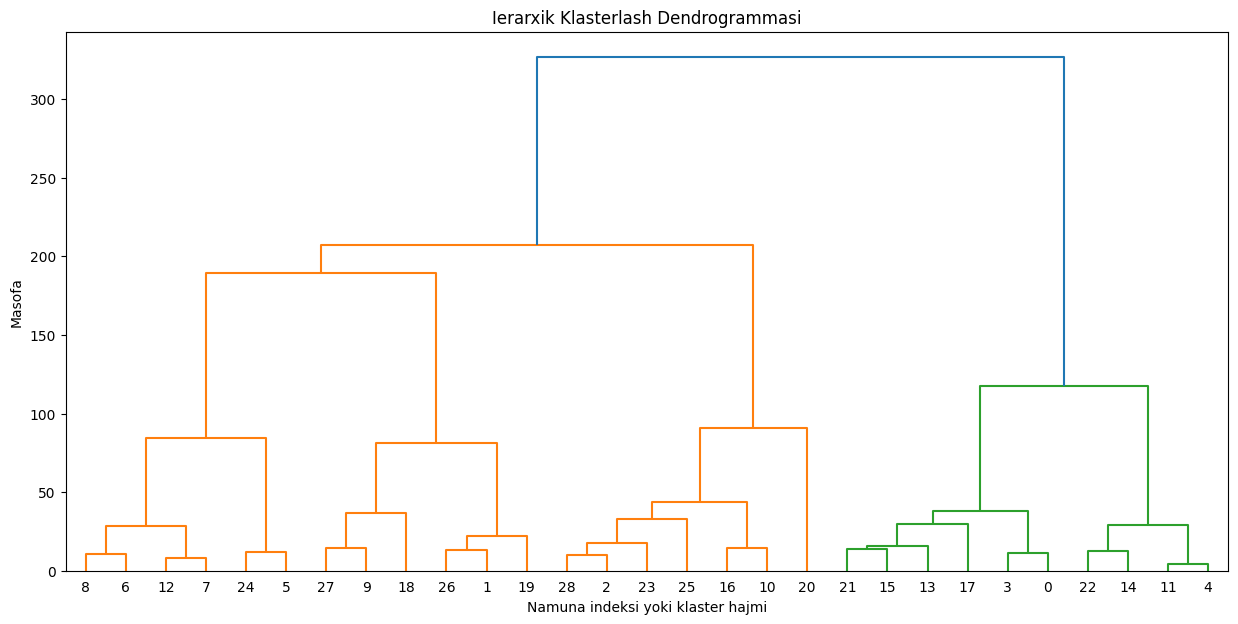

In [14]:

# 4.5 silhouette_score hisoblash
agg_score = silhouette_score(X[['num_commits', 'AVG(diff)']], agg_labels)
print(f"Ierarxik Klasterlash (n_clusters=5) uchun Silhouette Score: {agg_score:.4f}\n")

# 4.6 Dendrogramni vizuallashtirish
# Dendrogram - bu ierarxik klasterlash jarayonini grafik tarzda ko'rsatadi.
# Har bir birlashma gorizontal chiziq bilan ifodalanadi, uning balandligi birlashtirilgan klasterlar orasidagi masofani ko'rsatadi.
plt.figure(figsize=(15, 7))
plt.title('Ierarxik Klasterlash Dendrogrammasi')
plt.xlabel('Namuna indeksi yoki klaster hajmi')
plt.ylabel('Masofa')
linked = linkage(X[['num_commits', 'AVG(diff)']], method='ward') # 'ward' - klasterlar ichidagi dispersiyani minimallashtiradi.
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           leaf_rotation=0,
           show_leaf_counts=True)
plt.show()


## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [15]:

def optimize_clustering_parameter(model_class, model_params, param_name, param_range, data):
    """
    Klasterlash modelining parametrini optimallashtiradi va natijalarni vizuallashtiradi.

    Args:
        model_class (class): Klasterlash modelining sinfi (masalan, KMeans, AgglomerativeClustering).
        model_params (dict): Modelning standart parametrlari.
        param_name (str): Optimizatsiya qilinadigan parametr nomi (masalan, 'n_clusters', 'eps').
        param_range (list): Parametr qiymatlarining diapazoni.
        data (pd.DataFrame): Klasterlash uchun ishlatiladigan ma'lumotlar.

    Returns:
        tuple: silhouette_scores (list), best_param (float or int), best_score (float).
    """
    silhouette_scores = []
    best_score = -1
    best_param = None
    best_labels = None

    print(f"\n{model_class.__name__} uchun '{param_name}' parametrini optimallashtirish...")

    for param_value in param_range:
        current_params = model_params.copy()
        current_params[param_name] = param_value

        # KMeans uchun n_init ni qo'shamiz
        if model_class == KMeans and 'n_init' not in current_params:
            current_params['n_init'] = 10

        try:
            model = model_class(**current_params)
            labels = model.fit_predict(data)

            # DBSCAN uchun shovqinli nuqtalarni chiqarib tashlash
            if model_class == DBSCAN:
                core_samples_mask = (labels != -1)
                if np.sum(core_samples_mask) > 1 and len(np.unique(labels[core_samples_mask])) > 1:
                    score = silhouette_score(data[core_samples_mask], labels[core_samples_mask])
                else:
                    score = -1 # Hisoblash mumkin bo'lmasa, yomon ball beramiz
            else:
                score = silhouette_score(data, labels)
            
            silhouette_scores.append(score)
            
            if score > best_score:
                best_score = score
                best_param = param_value
                best_labels = labels

            print(f"  {param_name}={param_value}: Silhouette Score = {score:.4f}")
        except Exception as e:
            print(f"  {param_name}={param_value} uchun xato yuz berdi: {e}")
            silhouette_scores.append(np.nan) # Xato yuz berganda NaN qo'shamiz
            continue
    
    print(f"\nEng yaxshi parametr qiymati: {best_param} (Silhouette Score: {best_score:.4f})")

    # 5.4 Ikki subplotni qaytarish
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # Birinchi subplot: Silhouette Score o'zgarishi
    axes[0].plot(param_range, silhouette_scores, marker='o', linestyle='-')
    axes[0].set_title(f'Silhouette Score vs. {param_name} ({model_class.__name__})')
    axes[0].set_xlabel(f'{param_name} qiymati')
    axes[0].set_ylabel('Silhouette Score')
    axes[0].grid(True)
    axes[0].axvline(x=best_param, color='r', linestyle='--', label=f'Eng yaxshi: {best_param}')
    axes[0].legend()

    # Ikkinchi subplot: Eng yaxshi parametr bilan klasterlash natijasi
    if best_labels is not None:
        scatter = axes[1].scatter(data.iloc[:, 0], data.iloc[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.8)
        axes[1].set_title(f'Klasterlash natijasi (Eng yaxshi {param_name}={best_param})')
        axes[1].set_xlabel('Kommitlar soni (num_commits)')
        axes[1].set_ylabel('O\'rtacha farq (AVG(diff))')
        fig.colorbar(scatter, ax=axes[1], label='Klaster')
        axes[1].grid(True)

        if model_class == KMeans:
            # KMeans markazlarini ham chizamiz
            best_model = model_class(**{**model_params, param_name: best_param})
            best_model.fit(data)
            axes[1].scatter(best_model.cluster_centers_[:, 0], best_model.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Markazlar')
            axes[1].legend()
    else:
        axes[1].text(0.5, 0.5, "Klasterlash natijasi mavjud emas", horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)

    plt.tight_layout()
    plt.show()

    return silhouette_scores, best_param, best_score



KMeans uchun 'n_clusters' parametrini optimallashtirish...
  n_clusters=2: Silhouette Score = 0.4179
  n_clusters=3: Silhouette Score = 0.4390
  n_clusters=4: Silhouette Score = 0.4397
  n_clusters=5: Silhouette Score = 0.4464
  n_clusters=6: Silhouette Score = 0.4457
  n_clusters=7: Silhouette Score = 0.4964
  n_clusters=8: Silhouette Score = 0.5078
  n_clusters=9: Silhouette Score = 0.4561
  n_clusters=10: Silhouette Score = 0.4254

Eng yaxshi parametr qiymati: 8 (Silhouette Score: 0.5078)


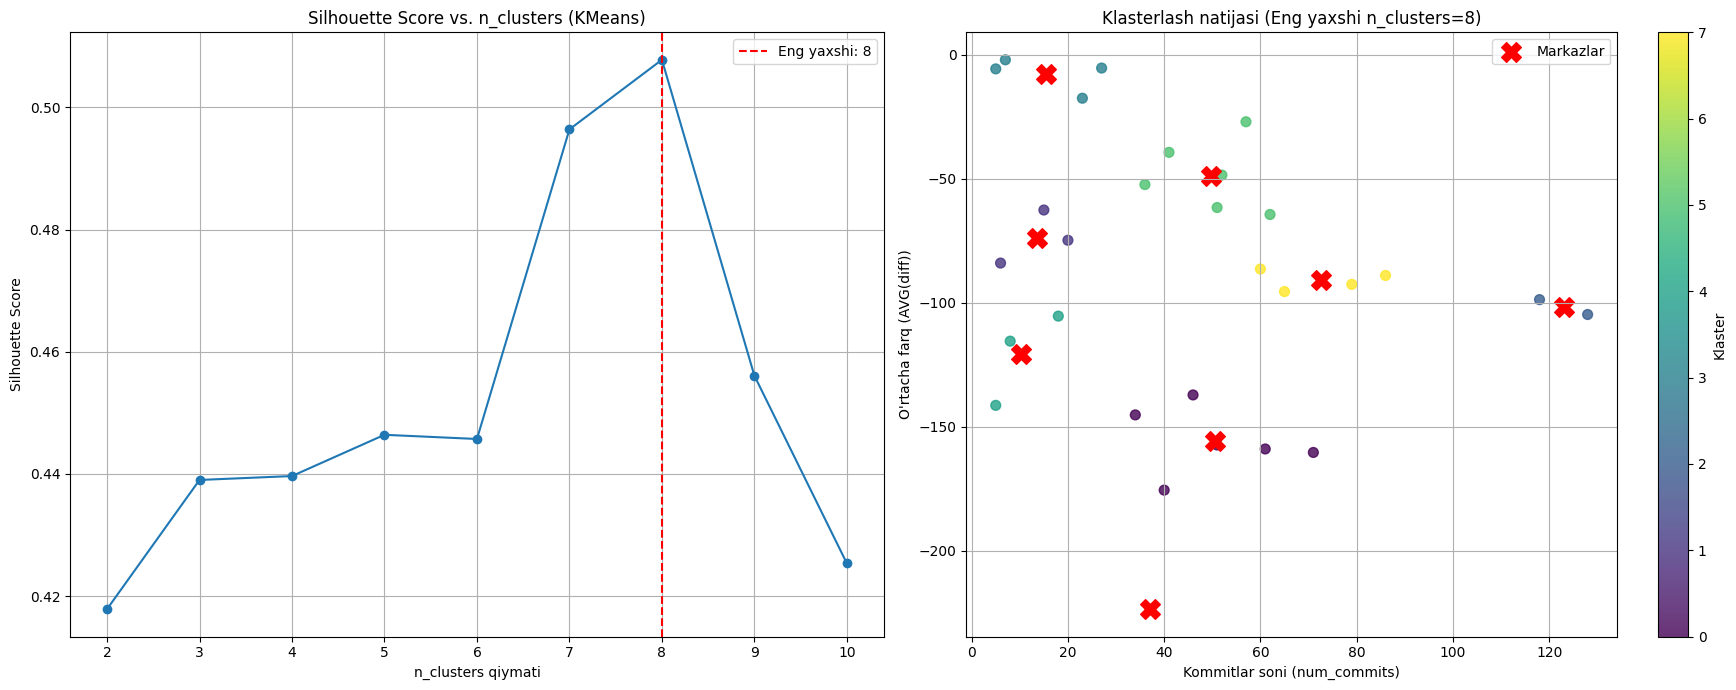

([0.41787451607810133,
  0.43901709571532954,
  0.4396571916717123,
  0.44641001650786977,
  0.44572484120013867,
  0.4964107297576806,
  0.50779855565622,
  0.4560860453429528,
  0.42535714978214945],
 8,
 0.50779855565622)

In [16]:

# Funktsiyani KMeans uchun sinab ko'rish
# n_clusters uchun diapazonni belgilaymiz
param_range_kmeans = range(2, 11) # 2 tadan 10 tagacha klasterlar
kmeans_model_params = {'random_state': 21}
optimize_clustering_parameter(KMeans, kmeans_model_params, 'n_clusters', param_range_kmeans, X[['num_commits', 'AVG(diff)']])



DBSCAN uchun 'eps' parametrini optimallashtirish...
  eps=5: Silhouette Score = -1.0000
  eps=10: Silhouette Score = 0.9480
  eps=15: Silhouette Score = 0.5554
  eps=20: Silhouette Score = 0.5442
  eps=25: Silhouette Score = 0.4216
  eps=30: Silhouette Score = 0.2648
  eps=35: Silhouette Score = -1.0000
  eps=40: Silhouette Score = -1.0000
  eps=45: Silhouette Score = -1.0000

Eng yaxshi parametr qiymati: 10 (Silhouette Score: 0.9480)


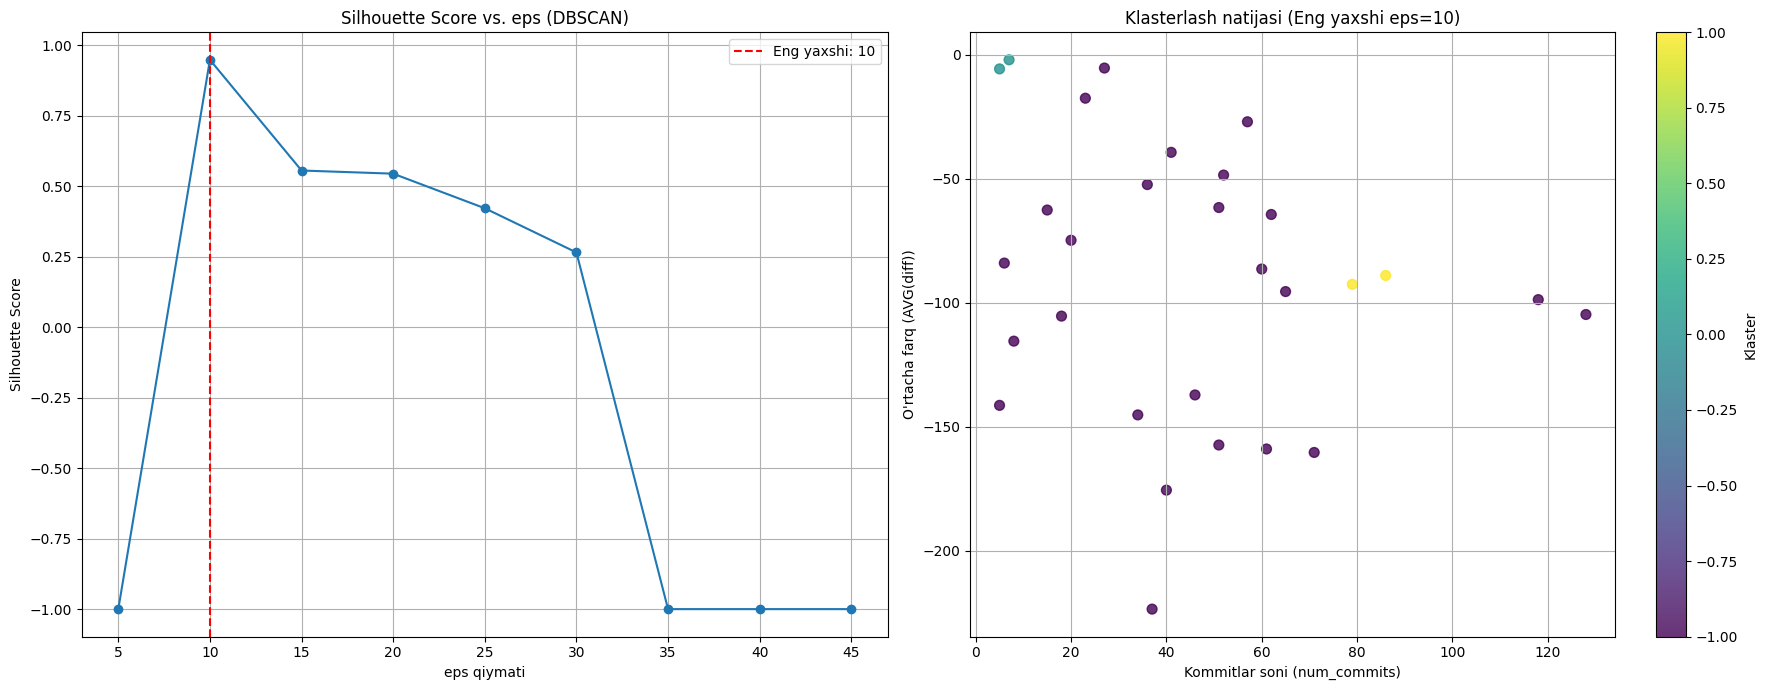

([-1,
  0.9480226534673492,
  0.5553952578355401,
  0.5441859666389783,
  0.4215691716242876,
  0.26480387526325777,
  -1,
  -1,
  -1],
 10,
 0.9480226534673492)

In [17]:

param_range_dbscan_eps = np.arange(5, 50, 5)
dbscan_model_params = {'min_samples': 2}
optimize_clustering_parameter(DBSCAN, dbscan_model_params, 'eps', param_range_dbscan_eps, X[['num_commits', 'AVG(diff)']])



DBSCAN uchun 'min_samples' parametrini optimallashtirish...
  min_samples=2: Silhouette Score = 0.5442
  min_samples=3: Silhouette Score = 0.6011
  min_samples=4: Silhouette Score = 0.5847
  min_samples=5: Silhouette Score = -1.0000
  min_samples=6: Silhouette Score = -1.0000
  min_samples=7: Silhouette Score = -1.0000

Eng yaxshi parametr qiymati: 3 (Silhouette Score: 0.6011)


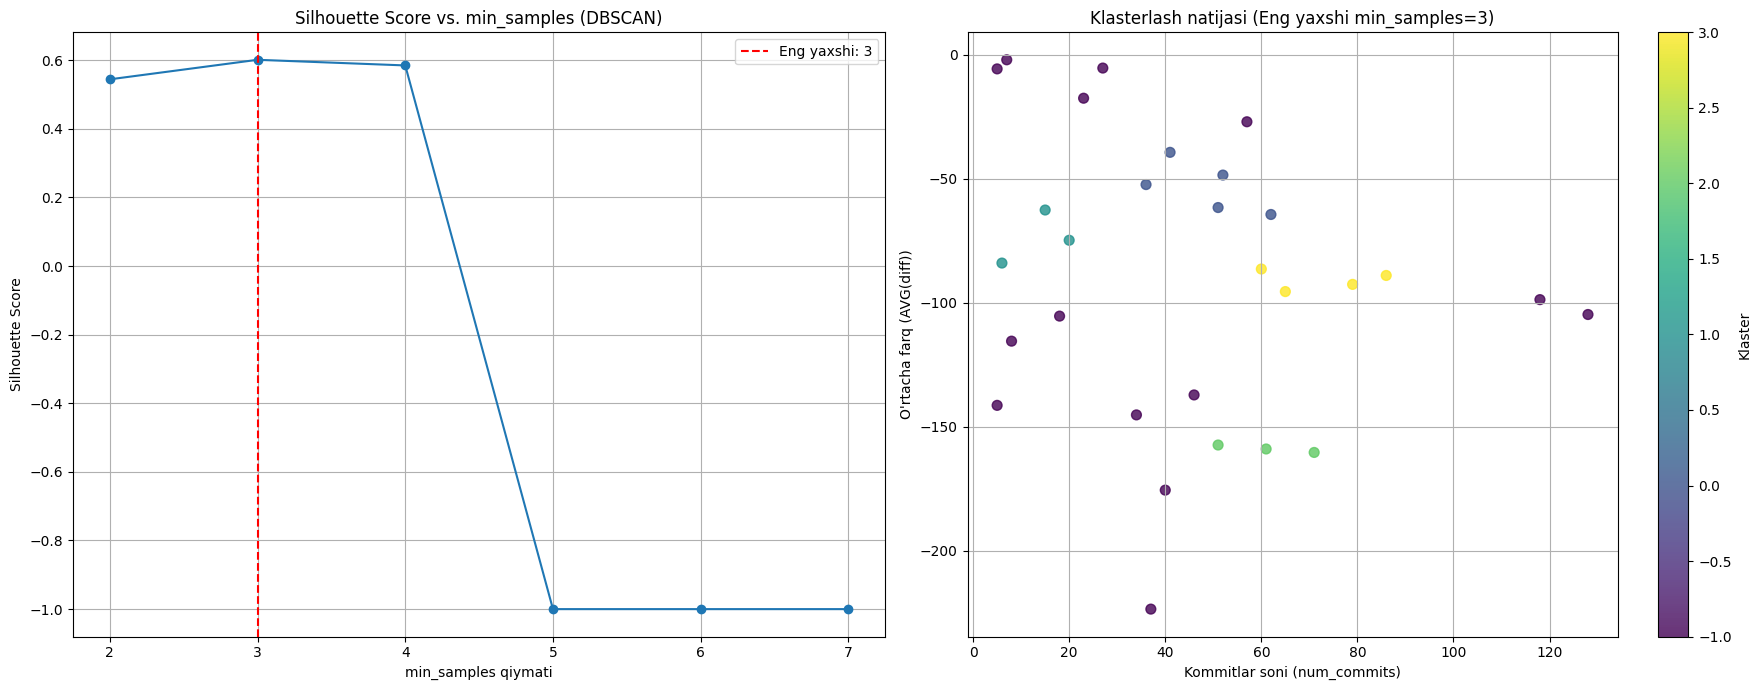

([0.5441859666389783, 0.6010852046755665, 0.5846660927167048, -1, -1, -1],
 3,
 0.6010852046755665)

In [18]:

# min_samples uchun ham sinab ko'rish mumkin
param_range_dbscan_min_samples = range(2, 8) # 2 dan 7 gacha
dbscan_model_params_min_samples = {'eps': 20} # eps ni belgilab qo'yamiz
optimize_clustering_parameter(DBSCAN, dbscan_model_params_min_samples, 'min_samples', param_range_dbscan_min_samples, X[['num_commits', 'AVG(diff)']])



AgglomerativeClustering uchun 'n_clusters' parametrini optimallashtirish...
  n_clusters=2: Silhouette Score = 0.3590
  n_clusters=3: Silhouette Score = 0.3390
  n_clusters=4: Silhouette Score = 0.4448
  n_clusters=5: Silhouette Score = 0.4638
  n_clusters=6: Silhouette Score = 0.4527
  n_clusters=7: Silhouette Score = 0.4866
  n_clusters=8: Silhouette Score = 0.5078
  n_clusters=9: Silhouette Score = 0.4758
  n_clusters=10: Silhouette Score = 0.4312

Eng yaxshi parametr qiymati: 8 (Silhouette Score: 0.5078)


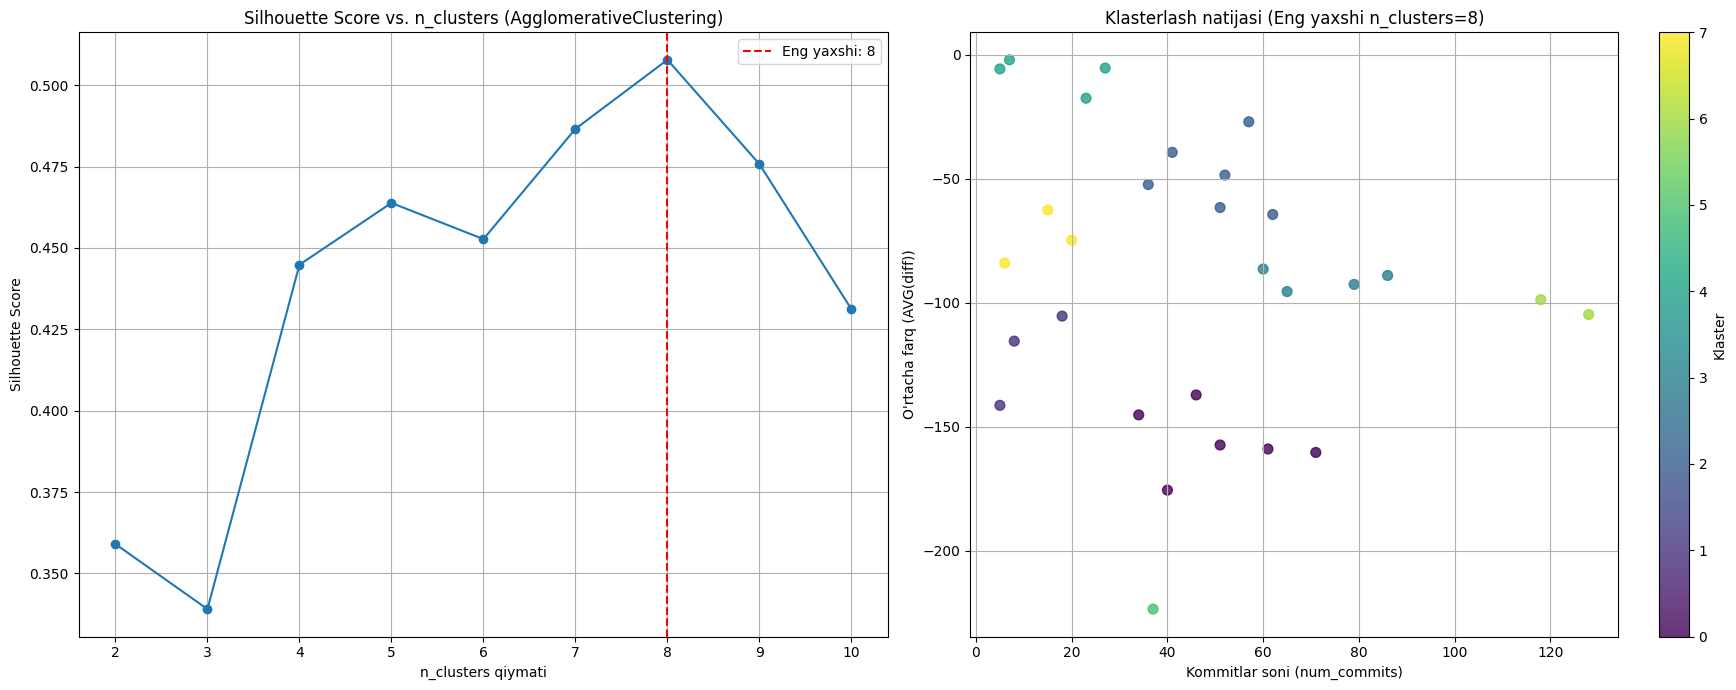

([0.35902490572221984,
  0.3390493703444805,
  0.4448362750283643,
  0.46383015199381467,
  0.4527145606287827,
  0.4865808853184314,
  0.50779855565622,
  0.47576869039147557,
  0.431193930539333],
 8,
 0.50779855565622)

In [19]:
param_range_agg = range(2, 11) # 2 tadan 10 tagacha klasterlar
agg_model_params = {} # AgglomerativeClustering uchun boshqa maxsus parametrlar yo'q
optimize_clustering_parameter(AgglomerativeClustering, agg_model_params, 'n_clusters', param_range_agg, X[['num_commits', 'AVG(diff)']])